In [ ]:
import pandas as pd

df = pd.read_excel("DATA_BC1.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Intensité,Vitesse,Temperature_Bobinage_1,Temperature_Bobinage_2,Temperature_Bobinage_3,Temperature_Palier_1_moteur,Temperature_Palier_2_moteur,Vibration,Temperature_Palier_1_vent,Temperature_Palier_2_vent,Débit d'air
0,2019-11-04 18:00:00,1149.19,877.14,107.75,104.91,102.90,73.31,61.07,1.79,65.42,45.67,210181.12
1,2019-11-04 19:00:00,85.75,65.37,93.91,92.26,89.31,69.11,60.59,0.56,59.21,47.46,15063.81
2,2019-11-04 20:00:00,0.00,0.00,80.04,79.04,73.95,59.61,56.94,0.44,43.30,35.15,0.00
3,2019-11-04 21:00:00,0.00,0.00,74.16,72.18,65.72,53.95,54.11,0.44,34.88,27.69,0.00
4,2019-11-04 22:00:00,0.00,0.00,69.57,66.83,60.32,50.40,51.16,0.44,30.16,23.29,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18492,2021-05-21 06:00:00,1054.56,913.82,113.40,111.03,108.92,79.37,82.36,2.67,48.84,35.84,185123.03
18493,2021-05-21 07:00:00,1059.72,913.79,114.03,111.65,109.53,79.68,83.20,2.67,53.96,38.22,184775.55
18494,2021-05-21 08:00:00,662.24,589.87,111.95,109.89,107.61,79.93,83.73,1.95,56.86,42.40,115932.27
18495,2021-05-21 09:00:00,408.18,345.31,98.06,97.49,94.98,72.36,77.35,1.52,51.23,41.00,71095.29


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         18497 non-null  datetime64[ns]
 1   Intensité                    18256 non-null  float64       
 2   Vitesse                      18256 non-null  float64       
 3   Temperature_Bobinage_1       18256 non-null  float64       
 4   Temperature_Bobinage_2       18256 non-null  float64       
 5   Temperature_Bobinage_3       18256 non-null  float64       
 6   Temperature_Palier_1_moteur  18256 non-null  float64       
 7   Temperature_Palier_2_moteur  18256 non-null  float64       
 8   Vibration                    18256 non-null  float64       
 9   Temperature_Palier_1_vent    18256 non-null  float64       
 10  Temperature_Palier_2_vent    18256 non-null  float64       
 11  Débit d'air                  18256 non-nu

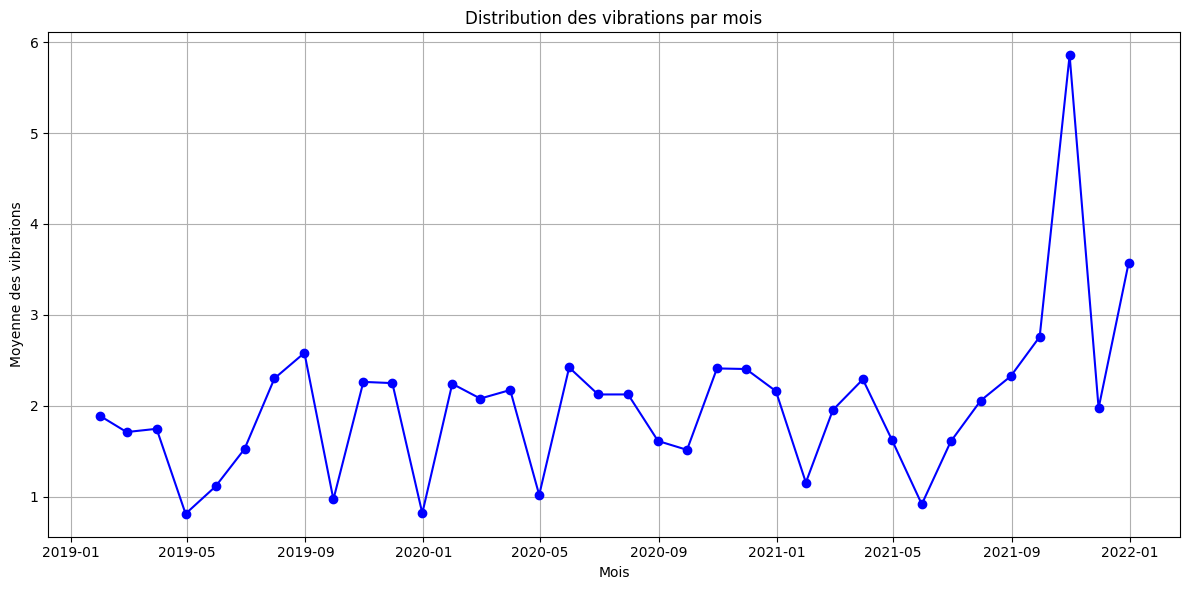

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Tracer le graphique en fonction du temps (mois)

plt.figure(figsize=(12, 6))
df_Monthly = df.resample('M', on='Date').mean()
plt.plot(df_Monthly.index, df_Monthly["Vibration"], marker='o', linestyle='-', color='b')

plt.xlabel("Mois")
plt.ylabel("Moyenne des vibrations")
plt.title("Distribution des vibrations par mois")
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

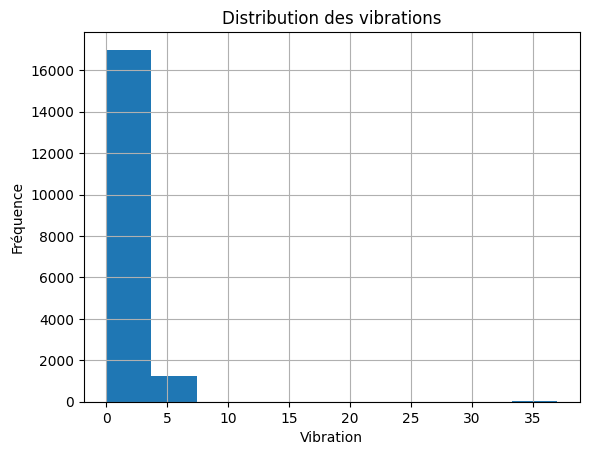

In [ ]:
plt.hist(df['Vibration'])

plt.xlabel('Vibration')
plt.ylabel('Fréquence')
plt.title('Distribution des vibrations')
plt.grid(True)
plt.show()

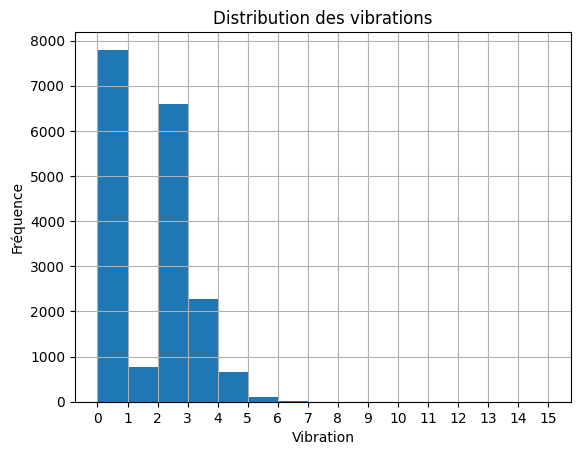

In [ ]:
import matplotlib.pyplot as plt

bins = [x for x in range(0, 16)]
plt.hist(df['Vibration'],  bins=bins)
plt.xticks(bins)
plt.xlabel('Vibration')
plt.ylabel('Fréquence')
plt.title('Distribution des vibrations')
plt.grid(True)
plt.show()

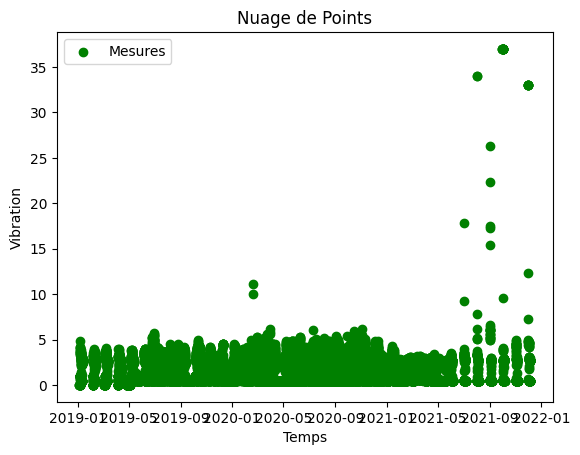

In [ ]:
# Créer un nuage de points
plt.scatter(df['Date'], df['Vibration'], color='green', label='Mesures')

# Ajouter des titres et des étiquettes
plt.title('Nuage de Points')
plt.xlabel('Temps')
plt.ylabel('Vibration')

# Ajouter une légende
plt.legend()

# Afficher le nuage de points
plt.show()

<ipython-input-7-73eecdb1ee13>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


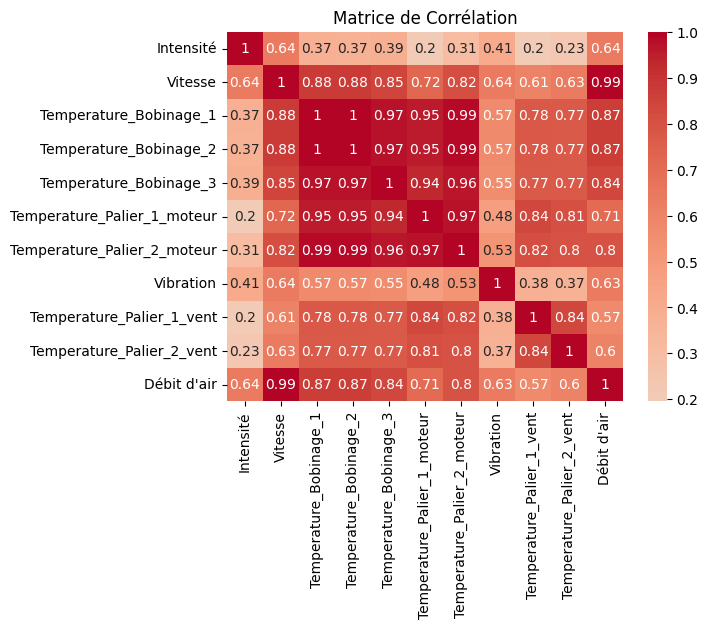

In [ ]:
# Créer une matrice de corrélation
correlation_matrix = df.corr()

# Créer une heatmap de la matrice de corrélation

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matrice de Corrélation')
plt.show()

In [ ]:
column_names = df.columns
print(column_names)

Index(['Date', 'Intensité', 'Vitesse', 'Temperature_Bobinage_1',
       'Temperature_Bobinage_2', 'Temperature_Bobinage_3',
       'Temperature_Palier_1_moteur', 'Temperature_Palier_2_moteur',
       'Vibration', 'Temperature_Palier_1_vent', 'Temperature_Palier_2_vent',
       'Débit d'air'],
      dtype='object')


In [ ]:
df = df.drop(['Intensité'], axis=1)
df = df.drop(['Temperature_Bobinage_2'], axis=1)
df = df.drop(['Temperature_Bobinage_3'], axis=1)
df = df.drop(['Temperature_Palier_1_moteur'], axis=1)
df = df.drop(['Temperature_Palier_1_vent'], axis=1)
df = df.drop(['Temperature_Palier_2_vent'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18497 entries, 0 to 18496
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         18497 non-null  datetime64[ns]
 1   Vitesse                      18256 non-null  float64       
 2   Temperature_Bobinage_1       18256 non-null  float64       
 3   Temperature_Palier_2_moteur  18256 non-null  float64       
 4   Vibration                    18256 non-null  float64       
 5   Débit d'air                  18256 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 867.2 KB


In [ ]:
nombre_lignes_avant = len(df)

# Supprimer les lignes vides
df = df.dropna()

# Supprimer les valeurs dupliquées
df = df.drop_duplicates()

nombre_lignes_apres = len(df)
lignes_supprimees = nombre_lignes_avant - nombre_lignes_apres
print("Nombre de lignes supprimées: ", lignes_supprimees)

Nombre de lignes supprimées:  242


In [ ]:
seuil = 2 * df['Vibration'].std() + 7.1
seuil

10.639767141432786

In [ ]:
nombre_lignes_avant = len(df)

df = df[df['Vibration'] <= seuil]
df = df[df['Vibration'] != 0]

nombre_lignes_apres = len(df)
lignes_supprimees = nombre_lignes_avant - nombre_lignes_apres
print("Nombre de lignes supprimées: ", lignes_supprimees)

Nombre de lignes supprimées:  244


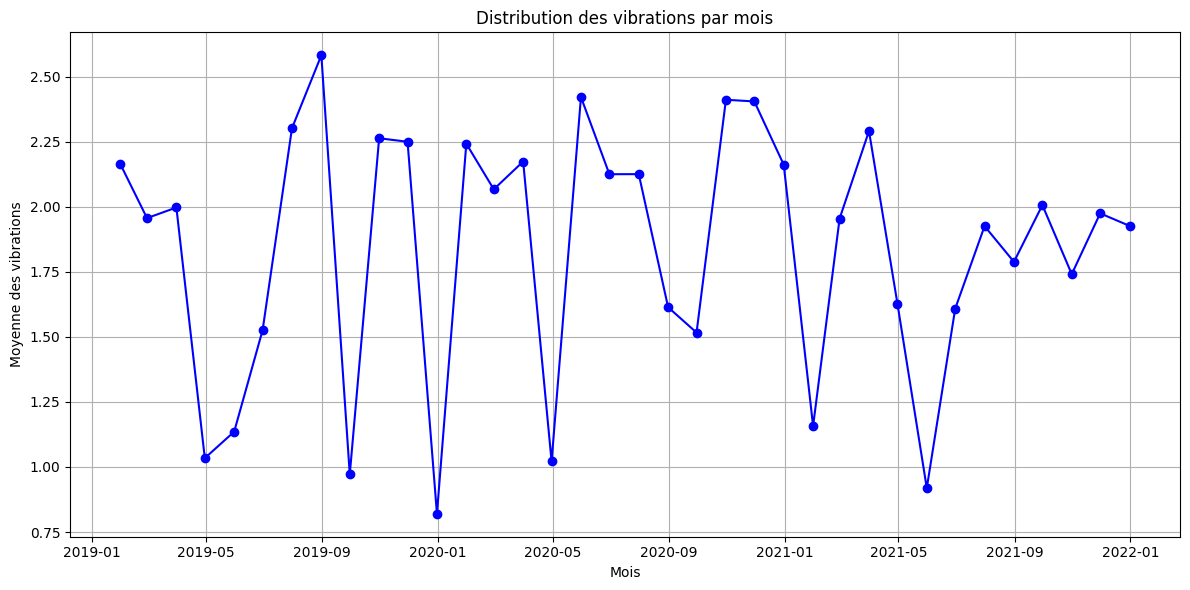

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Tracer le graphique en fonction du temps (mois)

plt.figure(figsize=(12, 6))
df_Monthly = df.resample('M', on='Date').mean()
plt.plot(df_Monthly.index, df_Monthly["Vibration"], marker='o', linestyle='-', color='b')

plt.xlabel("Mois")
plt.ylabel("Moyenne des vibrations")
plt.title("Distribution des vibrations par mois")
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

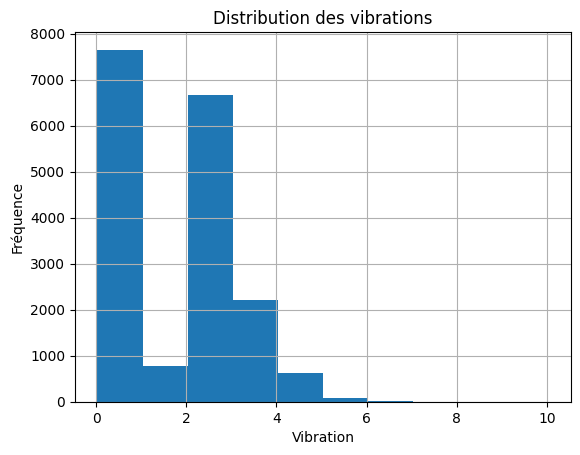

In [ ]:
plt.hist(df['Vibration'])

plt.xlabel('Vibration')
plt.ylabel('Fréquence')
plt.title('Distribution des vibrations')
plt.grid(True)
plt.show()

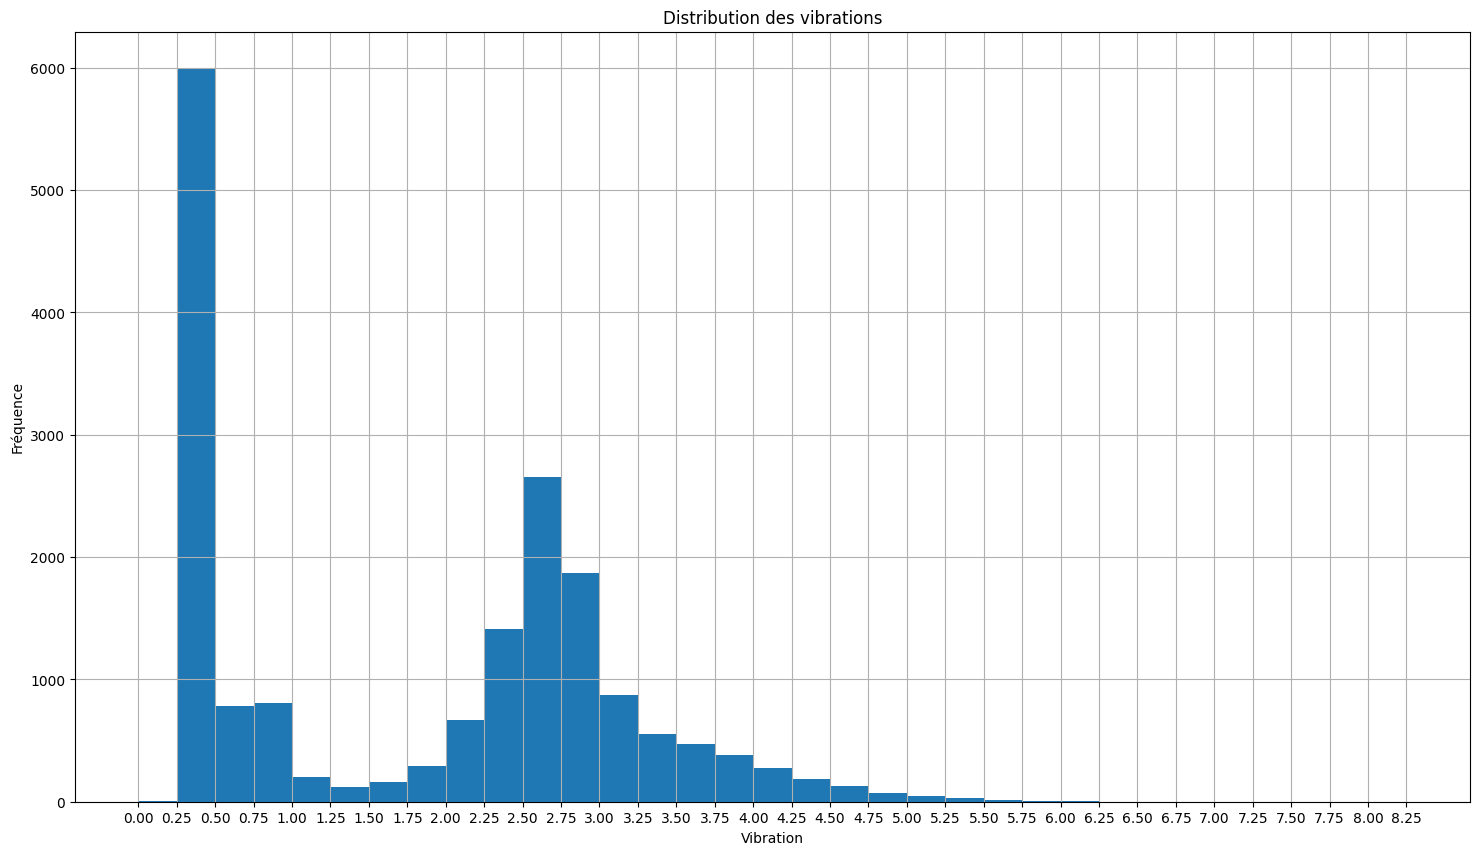

In [ ]:
bins = []
i = 0
while i < 8.5:
    bins.append(i)
    i += 0.25

plt.figure(figsize=(18, 10))
plt.hist(df['Vibration'],  bins=bins)
plt.xticks(bins)
plt.xlabel('Vibration')
plt.ylabel('Fréquence')
plt.title('Distribution des vibrations')
plt.grid(True)
plt.show()

In [ ]:
nombre_valeurs_sup_7 = df[df['Vibration'] > 7.1]['Vibration'].count()
print("Nombre de valeurs supérieures à 7.1 : ", nombre_valeurs_sup_7)

Nombre de valeurs supérieures à 7.1 :  5


In [ ]:
date_max = df['Date'].max()
date_min = df['Date'].min()

print("Date maximale : ", date_max)
print("Date minimale : ", date_min)

Date maximale :  2021-12-05 23:00:00
Date minimale :  2019-01-06 00:00:00


In [ ]:
from dateutil import relativedelta
# Trouver la date maximale et la date minimale
date_max = df['Date'].max()
date_min = df['Date'].min()

# Calculer la différence entre les deux dates en mois
difference_en_mois = relativedelta.relativedelta(date_max, date_min)
nombre_de_mois = difference_en_mois.years * 12 + difference_en_mois.months

print("Nombre de mois entre les deux dates : ", nombre_de_mois)

Nombre de mois entre les deux dates :  34


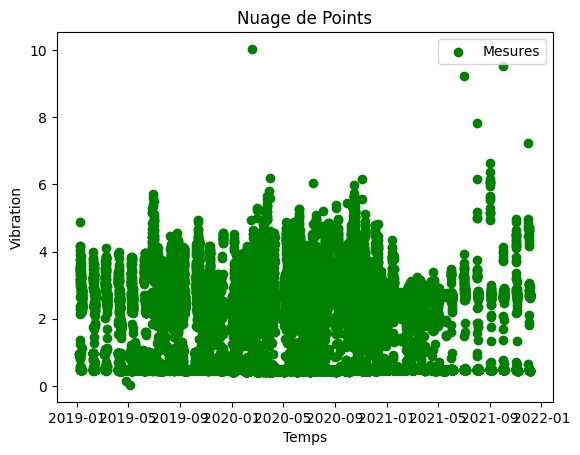

In [ ]:
# Créer un nuage de points
plt.scatter(df['Date'], df['Vibration'], color='green', label='Mesures')

# Ajouter des titres et des étiquettes
plt.title('Nuage de Points')
plt.xlabel('Temps')
plt.ylabel('Vibration')

# Ajouter une légende
plt.legend()

# Afficher le nuage de points
plt.show()

<ipython-input-32-998edfc8dc19>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


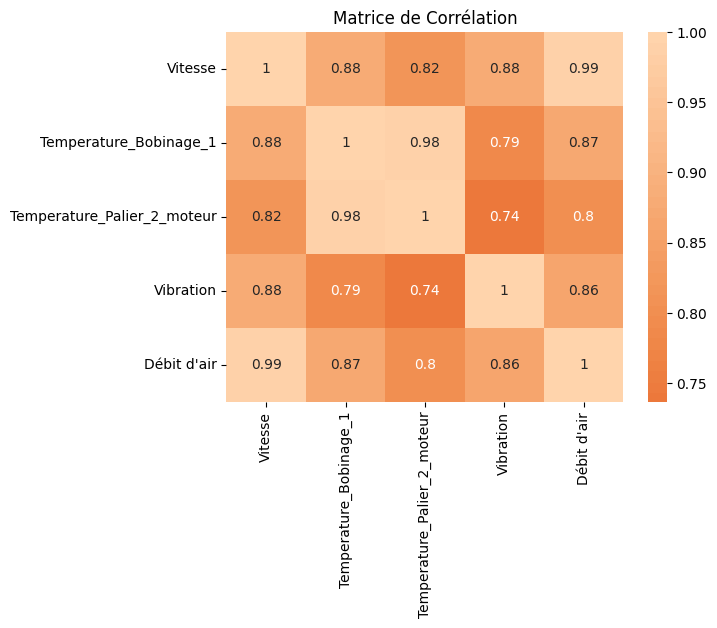

In [ ]:
# Créer une matrice de corrélation
correlation_matrix = df.corr()

# Créer une heatmap de la matrice de corrélation

sns.heatmap(correlation_matrix, annot=True,  center=0)
plt.title('Matrice de Corrélation')
plt.show()

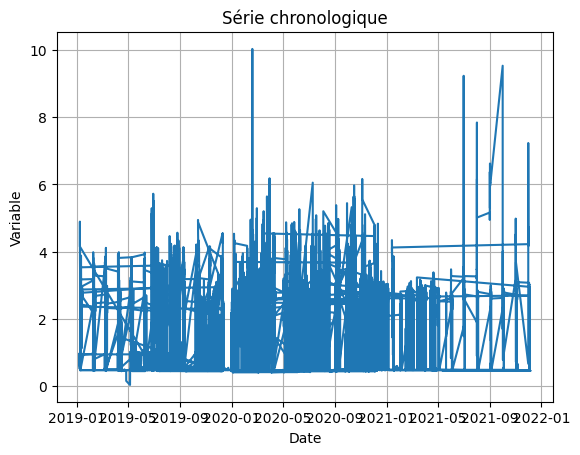

Résultats du test de Dickey-Fuller augmenté :
Statistique de test : -6.589112322998379
P-value : 7.188946725270464e-09
Valeurs critiques :
   1%: -3.4307140339845525
   5%: -2.8617008892236124
   10%: -2.566855637111816
La série chronologique est stationnaire 


In [ ]:
from statsmodels.tsa.stattools import adfuller

# Définir la série chronologique que vous souhaitez tester
serie_chronologique = df["Vibration"]

# Tracer la série chronologique pour une première inspection visuelle
plt.plot(df["Date"], serie_chronologique)
plt.xlabel("Date")
plt.ylabel("Variable")
plt.title("Série chronologique")
plt.grid(True)
plt.show()

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(serie_chronologique)

# Extraire et afficher les résultats du test
print("Résultats du test de Dickey-Fuller augmenté :")
print(f"Statistique de test : {result[0]}")
print(f"P-value : {result[1]}")
print("Valeurs critiques :")
for key, value in result[4].items():
    print(f"   {key}: {value}")

if result[1] <= 0.05:
    print("La série chronologique est stationnaire ")
else:
    print("La série chronologique n'est pas stationnaire (accepte l'hypothèse nulle)")

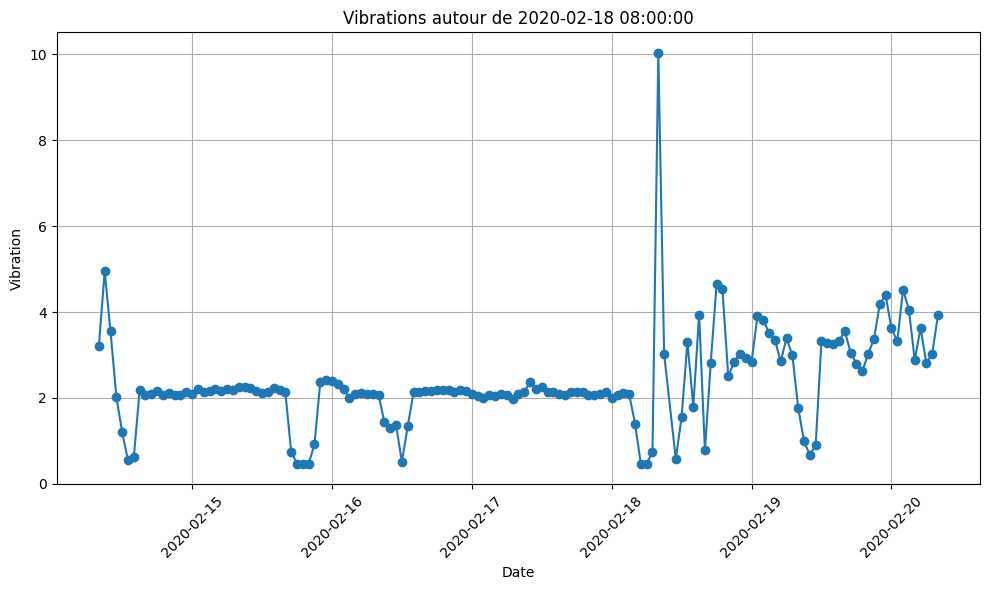

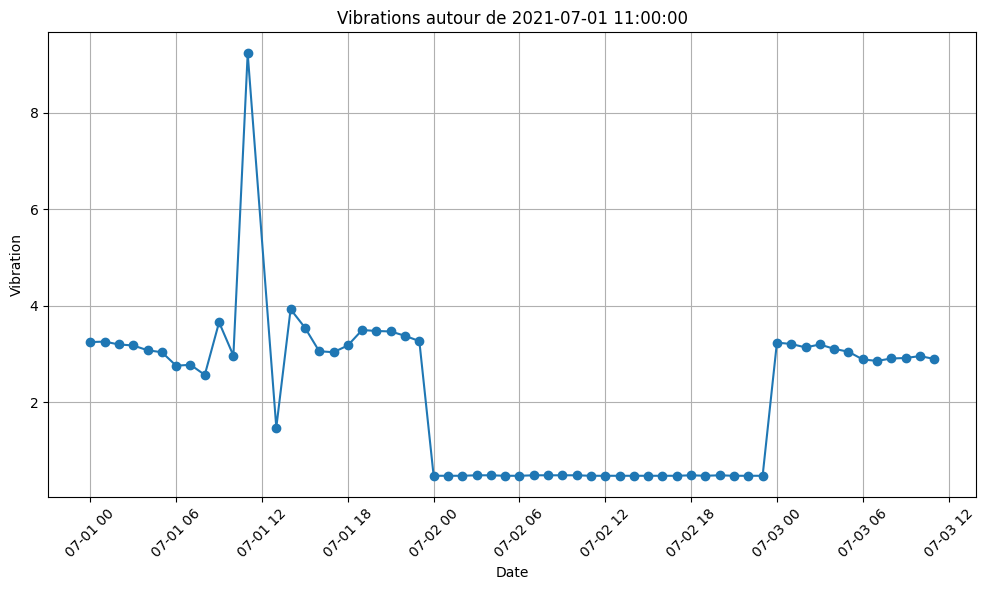

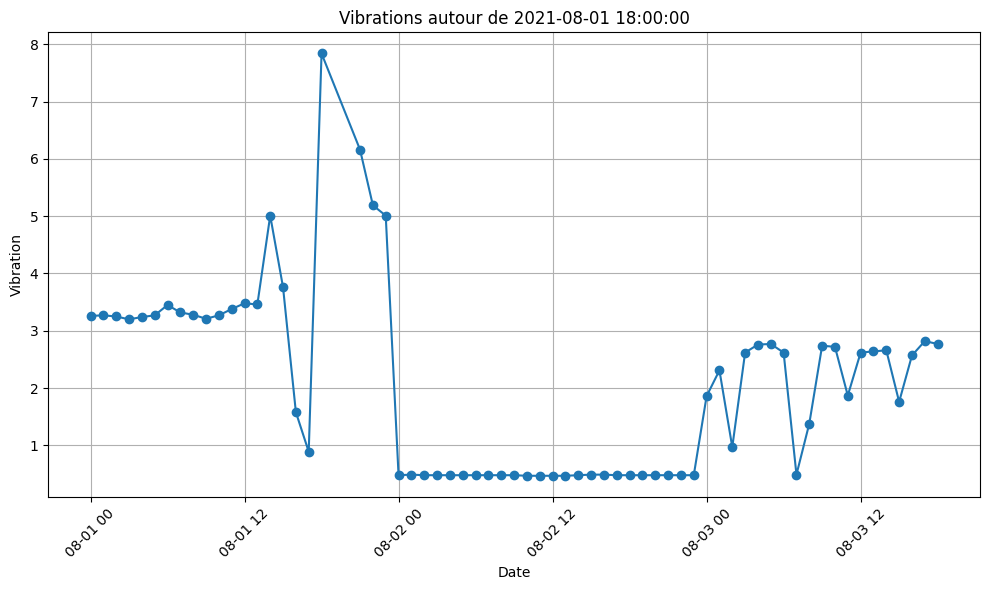

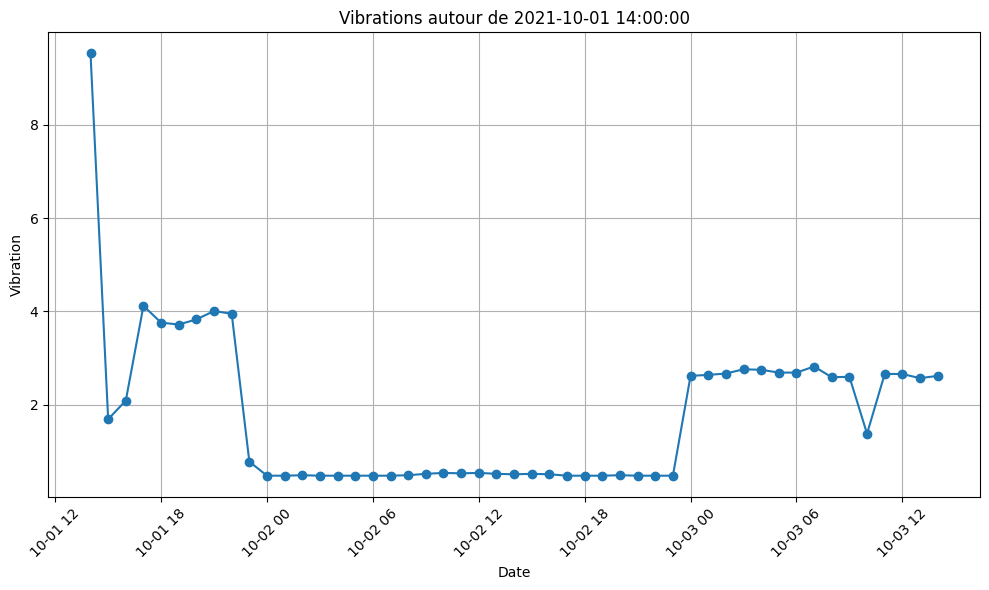

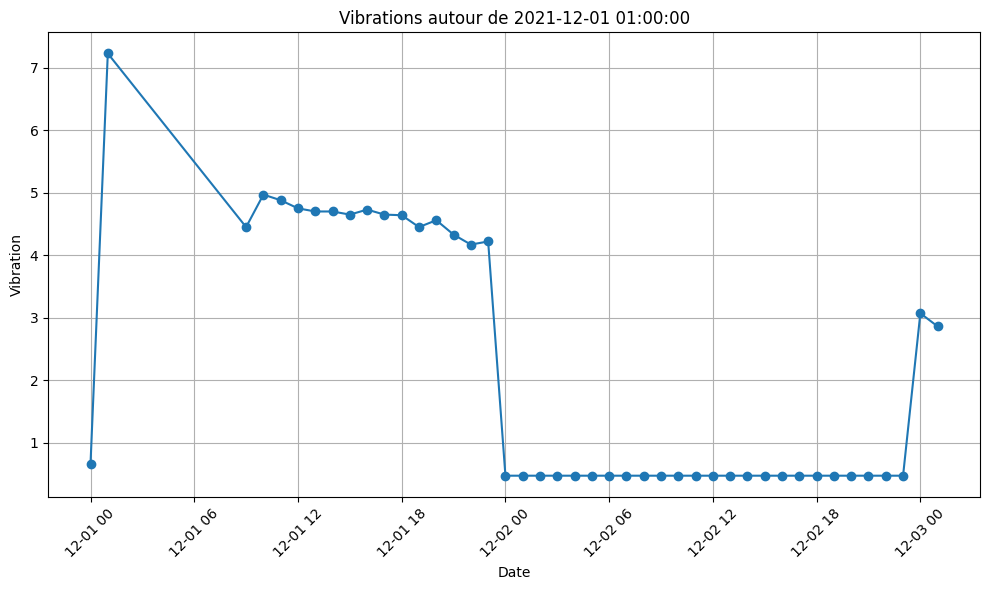

In [ ]:
# Filtrer les lignes avec des vibrations supérieures à 7.1
vibration_above_7_1 = df[df['Vibration'] > 7.1]

# Définir la plage de temps à 6 jours (4 jours avant, 2 jours après)
days_before = 4
days_after = 2

# Pour chaque valeur supérieure à 7.1, créer un graphique des vibrations par rapport à la plage de 6 jours
for index, row in vibration_above_7_1.iterrows():
    date = row['Date']
    start_date = date - pd.DateOffset(days=days_before)
    end_date = date + pd.DateOffset(days=days_after)
    date_range_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    plt.figure(figsize=(10, 6))
    plt.plot(date_range_data['Date'], date_range_data['Vibration'], marker='o')
    plt.title(f'Vibrations autour de {date}')
    plt.xlabel('Date')
    plt.ylabel('Vibration')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

MSE : 1.83
MAE : 1.09
RMSE : 1.35


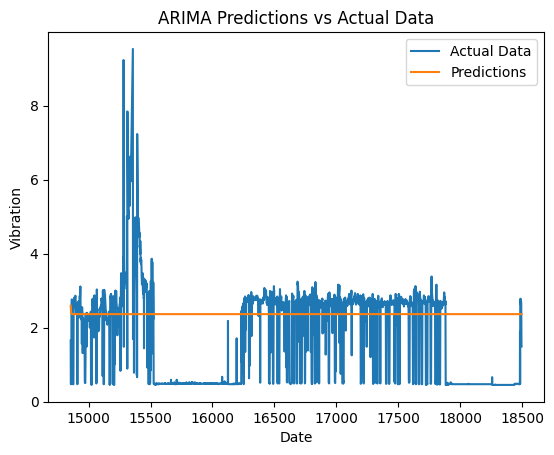

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load your data from a source (e.g., a CSV file)
# Suppose your data is stored in a DataFrame named "df"

# Convert the date column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Use the vibration column as the time series
vibration_series = df['Vibration']

# Split the data into training and test sets
train_size = int(0.8 * len(vibration_series))
train_data = vibration_series[:train_size]
test_data = vibration_series[train_size:]

# Create an ARIMA model
order = (2, 1, 1)  # Example ARIMA order (p, d, q)
model = ARIMA(train_data, order=order)
model_fit = model.fit()

# Predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Calculate evaluation metrics
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# Visualize predictions compared to the actual data
plt.plot(test_data.index, test_data.values, label='Actual Data')
plt.plot(test_data.index, predictions, label='Predictions')
plt.xlabel('Date')
plt.ylabel('Vibration')
plt.title('ARIMA Predictions vs Actual Data')
plt.legend()
plt.show()


Epoch 1/50
450/450 - 8s - loss: 0.0067 - 8s/epoch - 18ms/step
Epoch 2/50
450/450 - 5s - loss: 0.0031 - 5s/epoch - 10ms/step
Epoch 3/50
450/450 - 3s - loss: 0.0029 - 3s/epoch - 6ms/step
Epoch 4/50
450/450 - 4s - loss: 0.0029 - 4s/epoch - 8ms/step
Epoch 5/50
450/450 - 3s - loss: 0.0028 - 3s/epoch - 6ms/step
Epoch 6/50
450/450 - 3s - loss: 0.0028 - 3s/epoch - 6ms/step
Epoch 7/50
450/450 - 3s - loss: 0.0028 - 3s/epoch - 6ms/step
Epoch 8/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 7ms/step
Epoch 9/50
450/450 - 3s - loss: 0.0028 - 3s/epoch - 8ms/step
Epoch 10/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 6ms/step
Epoch 11/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 6ms/step
Epoch 12/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 6ms/step
Epoch 13/50
450/450 - 4s - loss: 0.0027 - 4s/epoch - 8ms/step
Epoch 14/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 6ms/step
Epoch 15/50
450/450 - 3s - loss: 0.0027 - 3s/epoch - 6ms/step
Epoch 16/50
450/450 - 4s - loss: 0.0027 - 4s/epoch - 9ms/step
Epoch 17/50
450

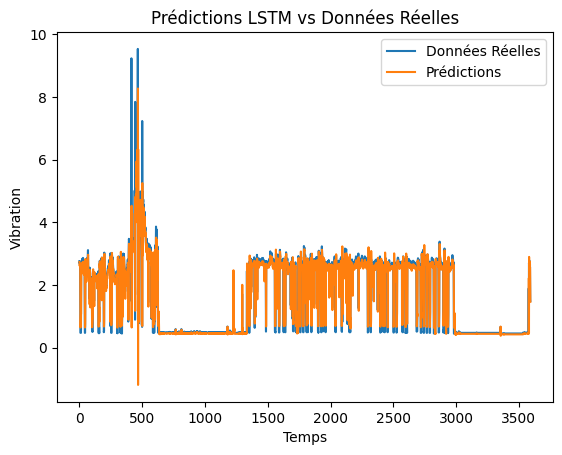

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


# Utiliser la colonne de vibrations comme série temporelle
vibration_series = df['Vibration'].values.reshape(-1, 1)

# Normalisation des données entre 0 et 1
scaler = MinMaxScaler()
vibration_series_scaled = scaler.fit_transform(vibration_series)

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(vibration_series_scaled))
train_data = vibration_series_scaled[:train_size]
test_data = vibration_series_scaled[train_size:]

# Créer des séquences pour le modèle LSTM
sequence_length = 10  # Longueur de la séquence
X_train, y_train = [], []
for i in range(len(train_data) - sequence_length):
    X_train.append(train_data[i:i+sequence_length])
    y_train.append(train_data[i+sequence_length])
X_train, y_train = np.array(X_train), np.array(y_train)

# Créer un modèle LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Entraînement du modèle
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Prédictions sur l'ensemble de test
X_test, y_test = [], []
for i in range(len(test_data) - sequence_length):
    X_test.append(test_data[i:i+sequence_length])
    y_test.append(test_data[i+sequence_length])
X_test, y_test = np.array(X_test), np.array(y_test)
predictions_scaled = model.predict(X_test)
predictions = scaler.inverse_transform(predictions_scaled)

# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# Visualisation des prédictions par rapport aux données réelles
plt.plot(scaler.inverse_transform(y_test), label='Données Réelles')
plt.plot(predictions, label='Prédictions')
plt.xlabel('Temps')
plt.ylabel('Vibration')
plt.title('Prédictions LSTM vs Données Réelles')
plt.legend()
plt.show()


1/1 [==============================] - 0s 24ms/step


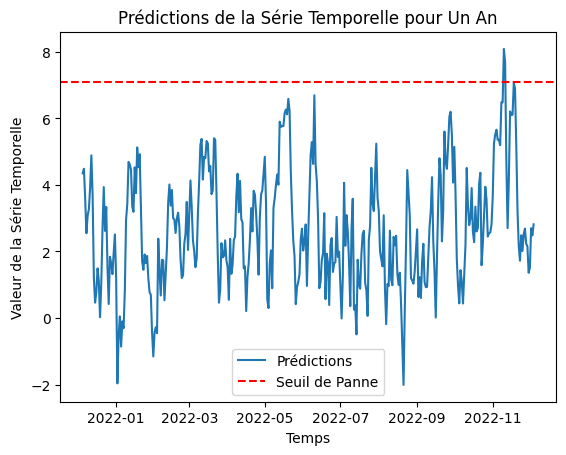

In [ ]:
# Utiliser le modèle LSTM pour générer des prédictions en continuant à nourrir le modèle avec ses propres prédictions
last_sequence = X_train[-1]  # Utilisez le dernier point de vos données d'entraînement
predicted_values = []

# Faire des prédictions sur la période d'un an en utilisant les prédictions précédentes comme entrée
for _ in range(365):  # Pour un an
    prediction = model.predict(np.array([last_sequence]))  # Prédire avec le dernier point

    # Ajouter un peu d'aléatoire aux prédictions pour éviter la convergence vers une valeur
    prediction_with_noise = prediction + np.random.normal(0, 0.1)  # Ajouter un peu de bruit
    predicted_values.append(prediction_with_noise[0, 0])

    last_sequence = np.roll(last_sequence, -1)  # Décaler la séquence d'une position
    last_sequence[-1] = prediction_with_noise  # Utiliser la prédiction avec bruit comme entrée

# Dénormaliser les prédictions si vous avez appliqué une normalisation
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Générer les valeurs temporelles pour la période d'un an à partir du 5 décembre 2021
start_date = pd.to_datetime('2021-12-05')
future_dates = pd.date_range(start=start_date, periods=365, freq='D')

# Tracer les prédictions pour la période d'un an
plt.plot(future_dates, predicted_values, label='Prédictions')
plt.axhline(y=7.1, color='red', linestyle='--', label='Seuil de Panne')

plt.xlabel('Temps')
plt.ylabel('Valeur de la Série Temporelle')
plt.title('Prédictions de la Série Temporelle pour Un An')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Create a DataFrame for the predictions and the corresponding dates
predicted_df = pd.DataFrame({'Date': future_dates, 'Prediction': predicted_values.flatten()})

# Filter predictions greater than 7.1
filtered_predictions = predicted_df[predicted_df['Prediction'] > 7.1]

# Display the table with predictions greater than 7.1 and their corresponding dates
print(filtered_predictions)



          Date  Prediction
340 2022-11-10    8.088198
341 2022-11-11    7.690170


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MSE : 1.63
MAE : 1.08
RMSE : 1.28


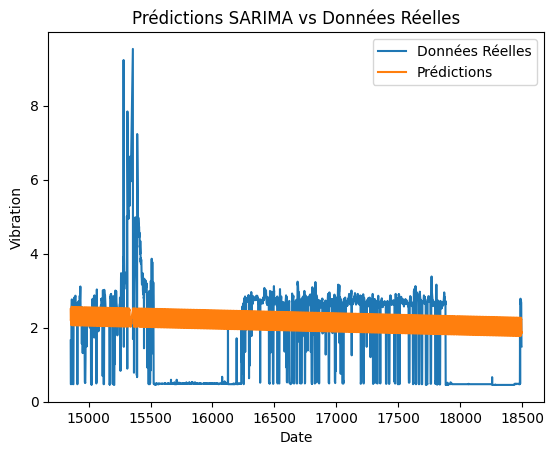

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Charger vos données à partir d'une source (par exemple, un fichier CSV)
# Supposons que vos données soient stockées dans un DataFrame appelé "df"

# Convertir la colonne de dates en objets datetime
df['Date'] = pd.to_datetime(df['Date'])

# Utiliser la colonne de vibrations comme série temporelle
vibration_series = df['Vibration']

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(vibration_series))
train_data = vibration_series[:train_size]
test_data = vibration_series[train_size:]

# Créer un modèle SARIMA
order = (2, 1, 1)  # Ordre du modèle ARIMA (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Ordre saisonnier (P, D, Q, S)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=0)

# Prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test_data))

# Calcul des métriques d'évaluation
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# Visualisation des prédictions par rapport aux données réelles
plt.plot(test_data.index, test_data.values, label='Données Réelles')
plt.plot(test_data.index, predictions, label='Prédictions')
plt.xlabel('Date')
plt.ylabel('Vibration')
plt.title('Prédictions SARIMA vs Données Réelles')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integ

MSE : 0.22
MAE : 0.23
RMSE : 0.47


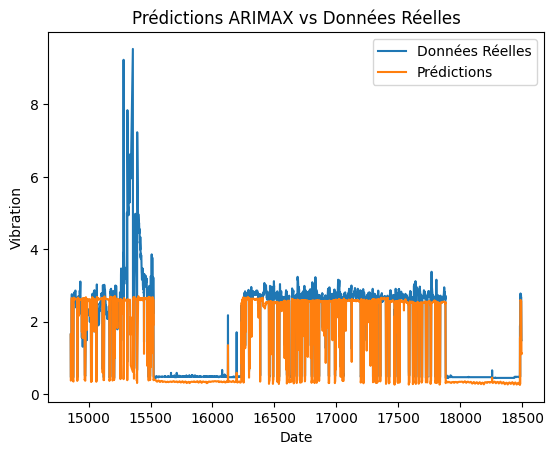

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Charger vos données à partir d'une source (par exemple, un fichier CSV)
# Supposons que vos données soient stockées dans un DataFrame appelé "df"

# Convertir la colonne de dates en objets datetime
df['Date'] = pd.to_datetime(df['Date'])

# Utiliser la colonne de vibrations comme variable dépendante (Y)
vibration_series = df['Vibration']

# Utiliser d'autres colonnes (par exemple, "Intensité" et "AutreVariable") comme variables exogènes
exog_data = df[['Vitesse', 'Temperature_Bobinage_1', 'Temperature_Palier_2_moteur', "Débit d'air"]]

# Diviser les données en ensembles d'entraînement et de test
train_size = int(0.8 * len(vibration_series))
train_data = vibration_series[:train_size]
test_data = vibration_series[train_size:]
train_exog = exog_data[:train_size]
test_exog = exog_data[train_size:]

# Créer un modèle ARIMAX
order = (2, 1, 1)  # Ordre du modèle ARIMA (p, d, q)
model = ARIMA(train_data, exog=train_exog, order=order)
model_fit = model.fit()

# Prédictions sur l'ensemble de test
predictions = model_fit.forecast(steps=len(test_data), exog=test_exog)

# Calcul des métriques d'évaluation
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mse)

print(f"MSE : {mse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")

# Visualisation des prédictions par rapport aux données réelles
plt.plot(test_data.index, test_data.values, label='Données Réelles')
plt.plot(test_data.index, predictions, label='Prédictions')
plt.xlabel('Date')
plt.ylabel('Vibration')
plt.title('Prédictions ARIMAX vs Données Réelles')
plt.legend()
plt.show()


Epoch 1/50
360/360 [==============================] - 7s 19ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 2/50
360/360 [==============================] - 6s 16ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 3/50
360/360 [==============================] - 4s 12ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 4/50
360/360 [==============================] - 3s 9ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 5/50
360/360 [==============================] - 3s 9ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 6/50
360/360 [==============================] - 3s 8ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 7/50
360/360 [==============================] - 3s 8ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 8/50
360/360 [==============================] - 3s 9ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 9/50
360/360 [==============================] - 4s 10ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/50
360/360 [==============================] - 3s 7ms/step - loss: 0.0025 - val_loss: 0.

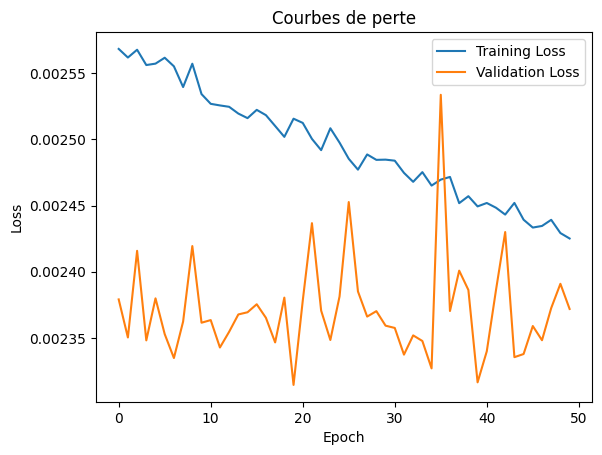

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Tracer les courbes de perte d'entraînement et de validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Courbes de perte')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Définir le nombre de splits pour la validation croisée
n_splits = 5

# Créer un TimeSeriesSplit pour la validation croisée (en tenant compte de la sérialisation temporelle)
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialiser une liste pour stocker les scores RMSE de chaque fold
rmse_scores = []

# Boucle à travers chaque fold de la validation croisée
for train_index, test_index in tscv.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Définir et entraîner le modèle LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Faire des prédictions et calculer le RMSE pour ce fold
    predictions = model.predict(X_test_fold)
    rmse = np.sqrt(mean_squared_error(y_test_fold, predictions))
    rmse_scores.append(rmse)

# Afficher les scores RMSE pour chaque fold
for i, score in enumerate(rmse_scores):
    print(f"Fold {i+1} - RMSE : {score:.2f}")

# Calculer la moyenne des scores RMSE
mean_rmse = np.mean(rmse_scores)
print(f"Moyenne des Scores RMSE : {mean_rmse:.2f}")


60/60 [==============================] - 0s 3ms/step
Fold 1 - RMSE : 0.05
Fold 2 - RMSE : 0.05
Fold 3 - RMSE : 0.05
Fold 4 - RMSE : 0.05
Fold 5 - RMSE : 0.05
Moyenne des Scores RMSE : 0.05
